In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


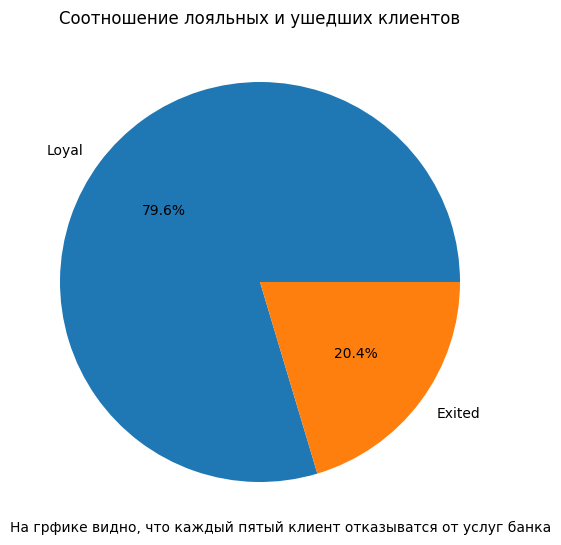

In [3]:
pie_df = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.set_title('Соотношение лояльных и ушедших клиентов')
axes.pie(
    pie_df,
    labels = ['Loyal', 'Exited'],
    autopct='%.1f%%',
);
fig.text(0, 0, s='На грфике видно, что каждый пятый клиент отказыватся от услуг банка');



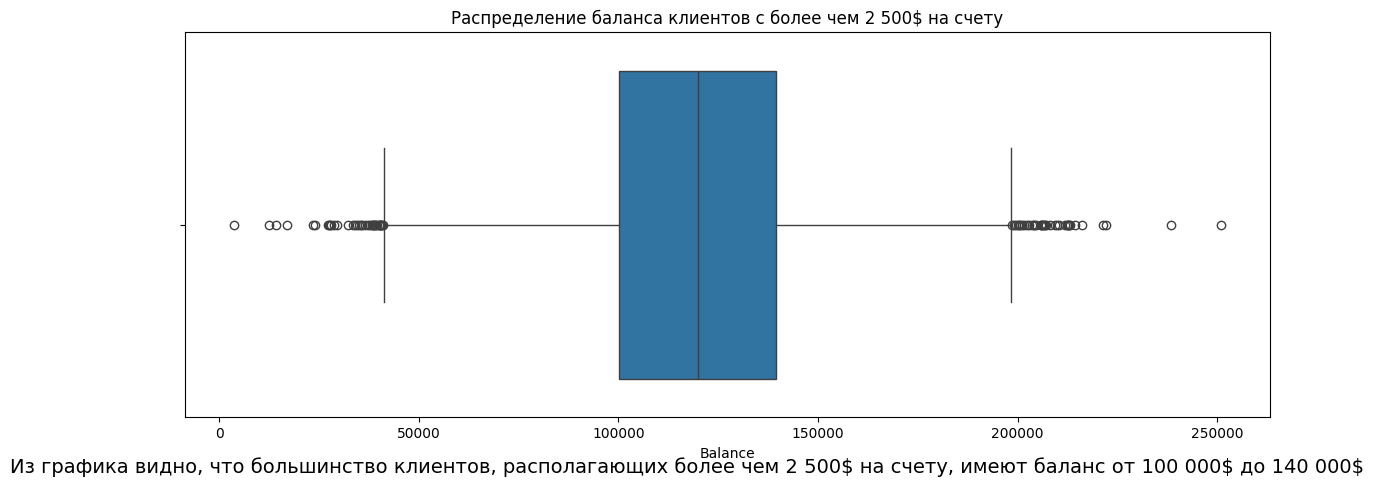

In [5]:
boxplot_df = churn_data[churn_data['Balance'] > 2500]
fig = plt.figure(figsize=(14,5))
boxplot = sns.boxplot(
    boxplot_df,
    x='Balance',
    orient = 'h'
    )
boxplot.set_title('Распределение баланса клиентов с более чем 2 500$ на счету');
fig.text(0,0, s='Из графика видно, что большинство клиентов, располагающих более чем 2 500$ на счету, имеют баланс от 100 000$ до 140 000$', fontsize = 14);

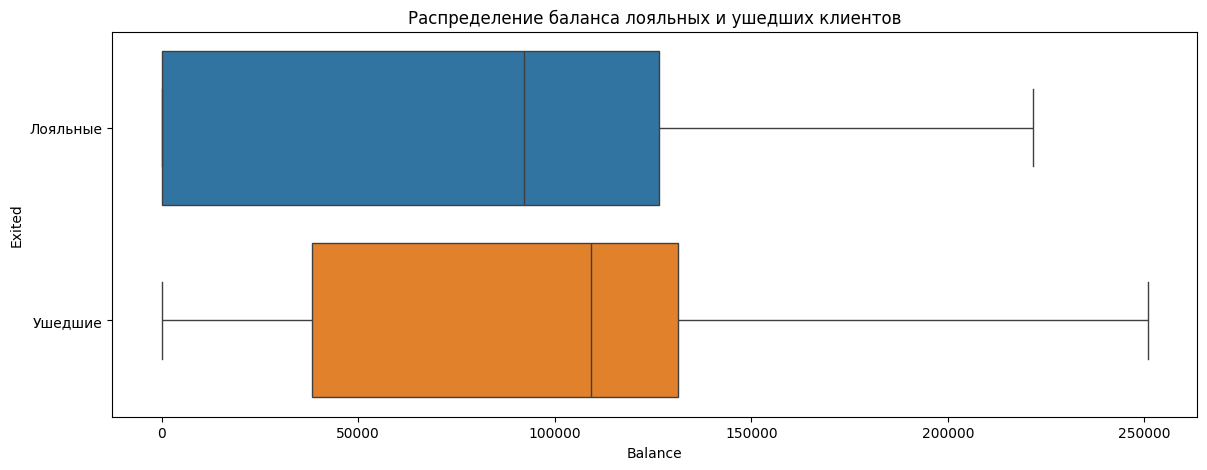

In [60]:
fig = plt.figure(figsize=(14,5))
boxplot = sns.boxplot(
    churn_data,
    x='Balance',
    y='Exited',
    orient = 'h',
    hue='Exited',
    legend=False
    )

boxplot.set_yticks([0,1])
boxplot.set_yticklabels(['Лояльные', 'Ушедшие'])
boxplot.set_title('Распределение баланса лояльных и ушедших клиентов');

Из графика видно, что баланс ушедших клиентов в большинстве случаев выше, чем у лояльных. Можно сделать вывод, что отток связан с обслуживанием крупных вкладов

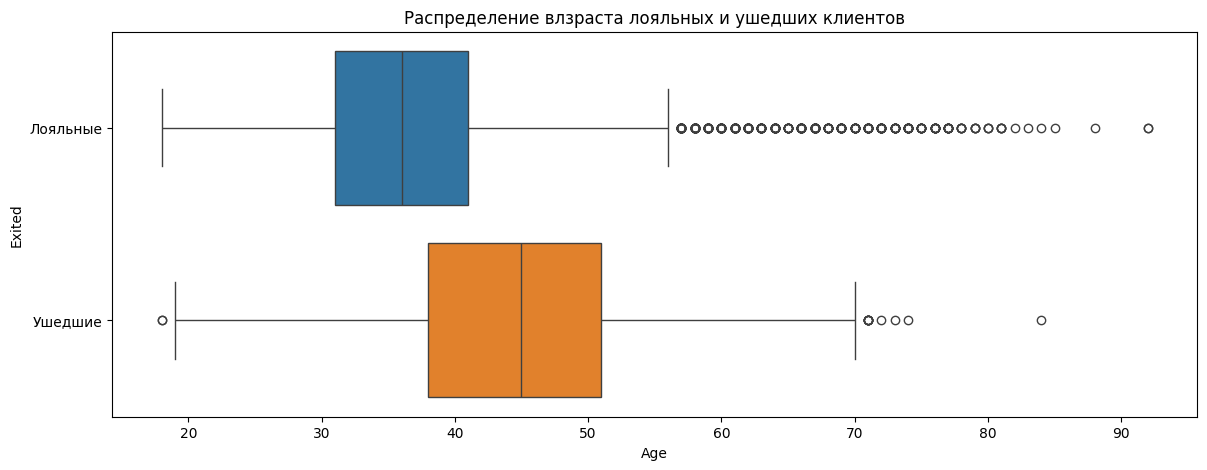

In [59]:
fig = plt.figure(figsize=(14,5))
boxplot = sns.boxplot(
    churn_data,
    x='Age',
    y='Exited',
    orient = 'h',
    hue='Exited',
    legend=False
    )

boxplot.set_yticks([0,1])
boxplot.set_yticklabels(['Лояльные', 'Ушедшие'])
boxplot.set_title('Распределение влзраста лояльных и ушедших клиентов');

Из графика видно, что число потенциальных выбросов по возрасту выше среди лояльных клиентов. Медианное значение возраста ушедших клиентов - 45 лет.
Банку стоит обратить внимание на возрастную группу 40-50 лет

In [75]:
scatter_df = churn_data.groupby(['Exited','CreditScore'], as_index=False)['EstimatedSalary'].mean()
scatter_df['Exited'] = scatter_df['Exited'].astype('string')
fig = px.scatter(
    scatter_df,
    x='CreditScore',
    y='EstimatedSalary',    
    color='Exited',
    width=1000,
    height=700,
    title='Зависимость кредитного рейтинга и предполгагаемой зарплаты'    
)
fig.show()

На графике видно, что прямой зависимости между кредитным рейтингом и предполагаемой зарплатой нет как для лояльных (0), так и для ушедших (1) клиентов. 

In [36]:
bar_df = churn_data.groupby('Gender', as_index=False)['Exited'].value_counts()
bar_df['Exited'] = bar_df['Exited'].astype('string')
per_df = churn_data.groupby('Gender', as_index=False)['Exited'].mean()

fig = px.bar(
    bar_df,
    x='Gender',
    y='count',
    color='Exited',
    barmode='group',
    width=1000,
    height=700,
    title='Количество лояльных и ушедших клиентов по половому признаку'
)
fig.show()
per_fig = px.bar(
    per_df,
    x='Gender',
    y='Exited',
    color='Gender',
    width=1000,
    height=700,
    title='Процент ушедших клиентов среди мужчин и женщин'
)
per_fig.show()

На первом графике удобно сравнить относительное количество лояльных клиентов среди мужчин и женщин. Второй график сравнивает процент ушедших клиентов в разрезе пола. Очевидно, что мужчины отказываются от услуг банка в заметно меньшем числе случаев.

In [31]:
bar_df = churn_data.groupby('NumOfProducts', as_index=False)['Exited'].value_counts()
bar_df['Exited'] = bar_df['Exited'].astype('string')

fig = px.bar(
    bar_df,
    x='NumOfProducts',
    labels={'NumOfProducts' : 'Количество приобретенных продуктов'},
    y='count',
    color='Exited',
    barmode='overlay',
    width=1000,
    height=700,
    title='Количество лояльных и ушедших клиентов в зависимости от количества приобретенных услуг'
)
fig.show()

Из графика понятно, что наилучшее сочетание лояльных и ушедших клиентов показывают клиенты, приобретшие 2 банковских продукта. Для клиентов с 3 и более продуктами - количество ушедших клиентов превышает количество оставшихся.

In [37]:
bar_df = churn_data.groupby('IsActiveMember', as_index=False)['Exited'].value_counts()
bar_df['Exited'] = bar_df['Exited'].astype('string')

fig = px.bar(
    bar_df,
    x='IsActiveMember',
    labels={'IsActiveMember' : 'Статус Активного Клиента'},
    y='count',
    color='Exited',
    barmode='group',
    width=1000,
    height=700,
    title='Количество лояльных и ушедших активных (1) и неактивных (0) клиентов'
)
fig.show()

График показывает, что неактивные клиенты чаще отказываются от услуг банка. Для улучшения ситуации среди неактивных клиентов нужно сохранять контакт после оказания услуги, возможно, предлагать продукты, которые позволят вернуть клиента в статус активного. 

In [46]:
choropleth_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(
    data_frame=choropleth_data,
    locations="Geography",
    locationmode = "country names",
    color = 'Exited',
    title='Процент ушедшиих клиентов в различных странах',
    width = 1000,
    height= 700,
    color_continuous_scale='Reds'
)

fig.show()


Наибольший процент клиентов отказался от услуг Банка в Германии, стоит обратить внимание на работу клиентского сервиса в этой стране. 

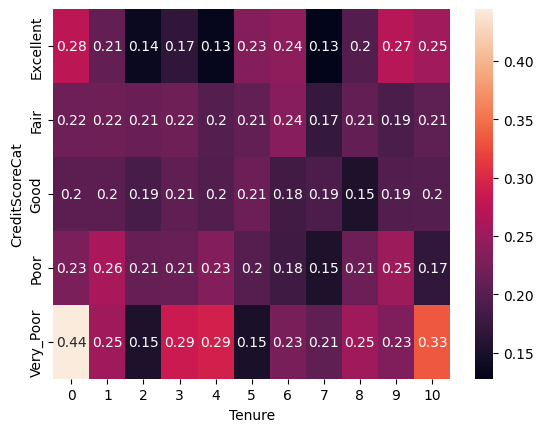

In [58]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"


churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat).astype('category')

heatmap_df = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean'
)

sns.heatmap(
    heatmap_df,
    annot=True
);
